# Model-Based Collaborative Filtering: Matrix-Factorization

The problem we are trying to solve here: To fill in the blanks in the user-movie DF matrix below. <br>
![image.png](attachment:8e2af9a0-939a-4b15-951f-d1d02e9bc099.png) <br>
Instead of using conventiaonal similarity and distance measures, I will fill in the gaps through the holistic mathematical model and prediction method.<br>
To fill the gaps, the weights of latent features assumed to exist for users and movies are calculated using existing data. Then, with these weight values, predictions are made for non-existent observations. <br>


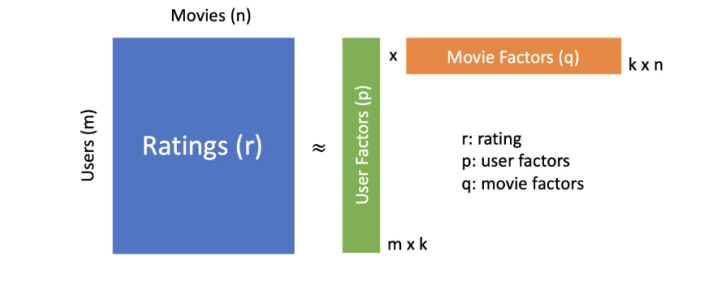

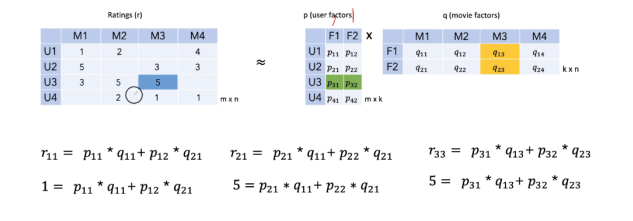

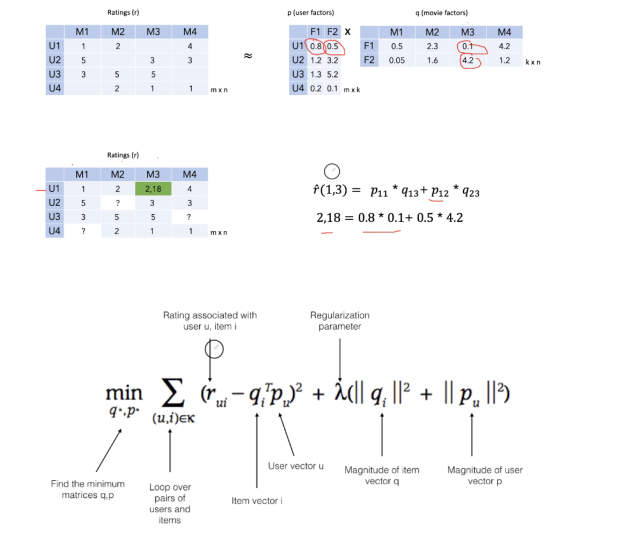

Regularization parameter ⇒ preventing/correcting implementation used for overfitting cases.<br>
Gradient Descent is the optimization method used for function minimization.<br>
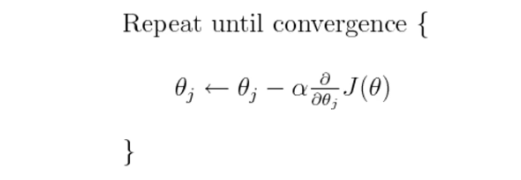


In [ ]:
# !pip install surprise
import pandas as pd
import numpy as np
from surprise import Reader, SVD, Dataset, accuracy
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate
pd.set_option('display.max_columns', None)

In [ ]:
movie = pd.read_csv('datasets/movie.csv')
rating = pd.read_csv('datasets/rating.csv')
df = movie.merge(rating, how="left", on="movieId")
df.head()

In [ ]:
movie_ids = [130219, 356, 4422, 541]
movies = ["The Dark Knight (2011)",
          "Cries and Whispers (Viskningar och rop) (1972)",
          "Forrest Gump (1994)",
          "Blade Runner (1982)"]

In [ ]:
# I created a sample data set from the available movie list.
sample_df = df[df.movieId.isin(movie_ids)]
sample_df.head()

In [ ]:
sample_df.shape

In [ ]:
user_movie_df = sample_df.pivot_table(index=["userId"],
                                      columns=["title"],
                                      values="rating")

In [ ]:
reader = Reader(rating_scale=(1, 5))# I created the scale range we will determine

In [ ]:
#I graded the data on a scale.
data = Dataset.load_from_df(sample_df[['userId',
                                       'movieId',
                                       'rating']], reader)

In [ ]:
# Step 2: Modelling
##############################
trainset, testset = train_test_split(data, test_size=.25)
svd_model = SVD()
svd_model.fit(trainset)
predictions = svd_model.test(testset)

In [ ]:
accuracy.rmse(predictions)

In [ ]:
# prediction for specific user
svd_model.predict(uid=1.0, iid=541, verbose=True)

In [ ]:
svd_model.predict(uid=1.0, iid=356, verbose=True)# estimated rating

In [ ]:
sample_df[sample_df["userId"] == 1] # real rating value

In [ ]:
# Step 3: Model Fine-Tuning
##############################
# epoch number => iteration number (number of iteration of the Stochastic Gradient Descent procedure)
# lr_all => learning rate (gamma semboldü hatırla!)
param_grid = {'n_epochs': [5, 10, 20],
              'lr_all': [0.002, 0.005, 0.007]}

# hyperparameters; These are the Args included in the SVD() function detail.
gs = GridSearchCV(SVD,
                  param_grid,
                  measures=['rmse', 'mae'],
                  cv=3, # 3 phase cross validation :Divide the dataset into 3 and build a model with 2 parts
                  # Test with 1 piece. Repeat this in combinatorics! Take the average of these test runs!
                  n_jobs=-1, #Use processors at full performance.
                  joblib_verbose=True) # make report!

gs.fit(data)

gs.best_score['rmse']
gs.best_params['rmse']

In [ ]:
# Step 4: Final Model and Prediction
##############################
dir(svd_model)
svd_model.n_epochs
svd_model = SVD(**gs.best_params['rmse'])

In [ ]:
data = data.build_full_trainset()
svd_model.fit(data)

In [ ]:
svd_model.predict(uid=1.0, iid=541, verbose=True)